In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### Problema 1
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones,
donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

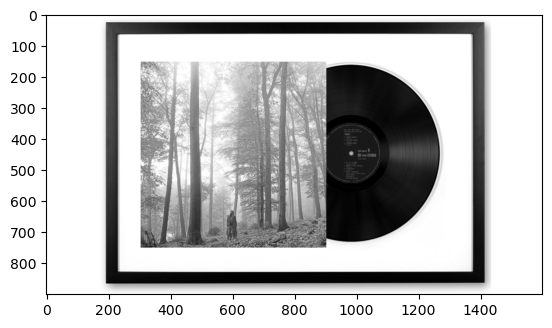

In [2]:
strImg = "TS_folklore.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [3]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    return newImg

In [4]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaX = np.zeros((alto, ancho, 1)) #alto, ancho, 1 canal porque es escala de grises
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derX = img[i, j + 1] - img[i, j]
            DerivadaX[i, j] = derX
    return DerivadaX

In [5]:
imgDerX = derivadaX(img)
cv2.imwrite("DerX.jpg", imgDerX)

True

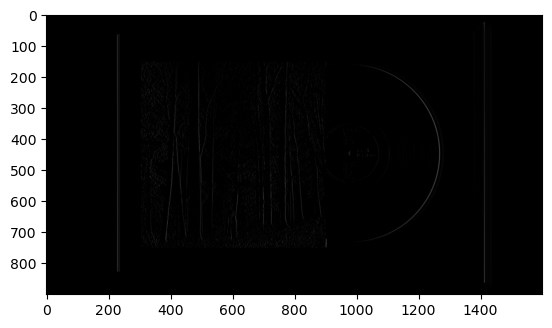

In [6]:
strImg = "DerX.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [7]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaY = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto - 1):
        for j in range(0, ancho):
            derY = img[i + 1, j] - img[i, j] #resta del valor siguiente, menos el anterior
            DerivadaY[i, j] = derY
    return DerivadaY

In [8]:
imgDerY = derivadaY(img)
cv2.imwrite("DerY.jpg", imgDerY)

True

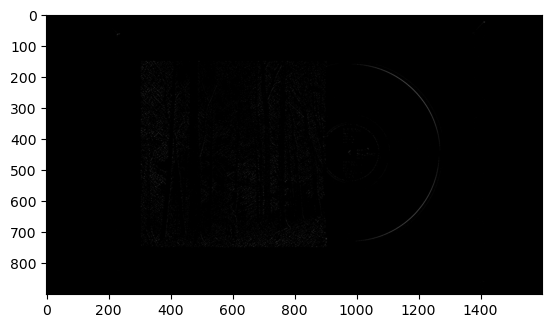

In [9]:
strImg = "DerY.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [10]:
def magnitud(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
            salida[i,j] = mag
    return salida

In [11]:
magnitudOut = magnitud(imgDerX, imgDerY)
cv2.imwrite("Z.jpg", magnitudOut)

True

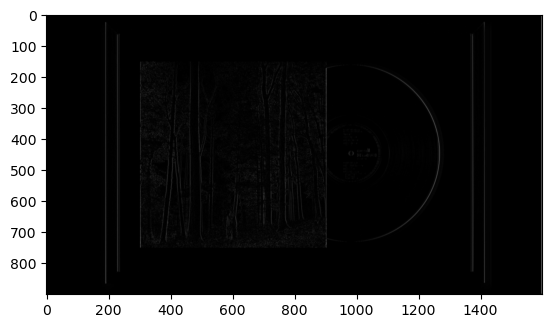

In [12]:
strImg = "Z.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

### Problema 2
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal,
logarıtmica y exponencial.

In [73]:
def transformaciones(imagename):
    img_neg = cv2.imread(imagename)
    img_neg = cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB)

    img_lin = cv2.imread(imagename)
    img_lin = cv2.cvtColor(img_lin, cv2.COLOR_BGR2RGB)

    img_log = cv2.imread(imagename)
    img_log = cv2.cvtColor(img_log, cv2.COLOR_BGR2RGB)

    img_exp = cv2.imread(imagename)
    img_exp = cv2.cvtColor(img_exp, cv2.COLOR_BGR2RGB)

    #negativa
    height, width, _ = img_neg.shape

    for i in range(0, height - 1):
        for j in range(0, width - 1):
            pixel = img_neg[i, j] #valor del pixel 
            
            # Negacion de cada canal, se resta el valor a 255
            pixel[0] = 255 - pixel[0] #rojo
            pixel[1] = 255 - pixel[1] #verde
            pixel[2] = 255 - pixel[2] #azul 
            
            img_neg[i, j] = pixel

    #lineal

    #logaritmica
    c = 255 / np.log(1 + np.max(img_log))
    log_image = c * (np.log(img_log + 1))

    log_image = np.array(log_image, dtype = np.uint8)

    #exponencial
    gamma = 1.2
    exponencial = np.array(255*(img_exp / 255) ** gamma, dtype = 'uint8')
    
    
    plt.imshow(img_neg)
    plt.show()
    plt.imshow(log_image)
    plt.show()
    plt.imshow(exponencial)
    plt.show() 

    

C:\Users\Pc\AppData\Local\Temp\ipykernel_14840\483428771.py:32: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img_log + 1))


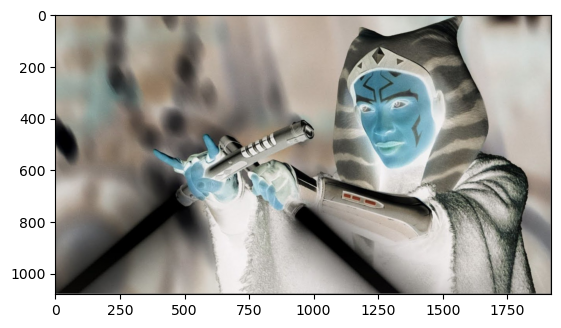

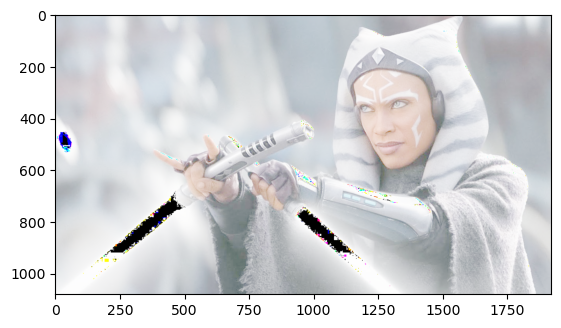

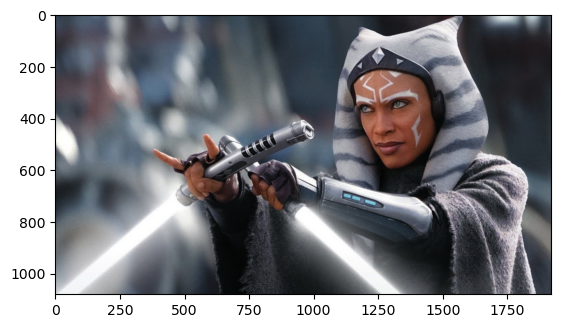

In [74]:
imagename = 'star-wars-ahsoka.jpg'
transformaciones(imagename)

### Problema 3
Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

In [75]:

def op_aritmeticas_imagenes(img1, img2):
        alto1, ancho1, canales1 = img1.shape
        alto2, ancho2, canales2 = img2.shape

        if alto1 != alto2 or ancho1 != ancho2:
                img2 = cv2.resize(img2, (ancho1, alto1))

        #suma
        suma = cv2.addWeighted(img1, 0.5, img2, 0.4, 0)
        cv2.imwrite("Suma.jpg", suma)
        strImg = "Suma.jpg"
        img_suma = cv2.imread(strImg)
        #plt.imshow(img, cmap="gray")

        #resta
        resta = cv2.subtract(img1, img2)
        cv2.imwrite("Resta.jpg", resta)
        strImg = "Resta.jpg"
        img_resta = cv2.imread(strImg)
        plt.imshow(img_resta, cmap="gray")

        #and
        and_function = cv2.bitwise_and(img2, img1, mask = None)
        cv2.imwrite("And.jpg", and_function)
        strImg = "And.jpg"
        img_and = cv2.imread(strImg)
        #plt.imshow(img_and, cmap="gray")

        #or
        or_function = cv2.bitwise_or(img2, img1, mask = None)
        cv2.imwrite("Or.jpg", or_function)
        strImg = "Or.jpg"
        img_or = cv2.imread(strImg)
        #plt.imshow(img_or, cmap="gray")

        #xor
        xor_function = cv2.bitwise_or(img2, img1, mask = None)
        cv2.imwrite("Xor.jpg", xor_function)
        strImg = "Xor.jpg"
        img_xor = cv2.imread(strImg)
        #plt.imshow(img_xor, cmap="gray")

        plt.imshow(img_suma, cmap="gray")
        plt.show()
        plt.imshow(img_resta, cmap="gray")
        plt.show()
        plt.imshow(img_and, cmap="gray")
        plt.show()
        plt.imshow(img_or, cmap="gray")
        plt.show()
        plt.imshow(img_xor, cmap="gray")
        plt.show()

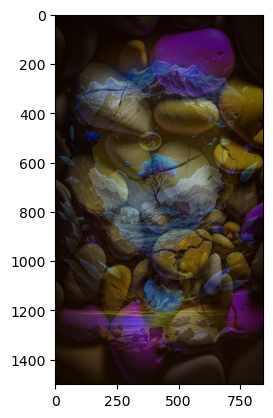

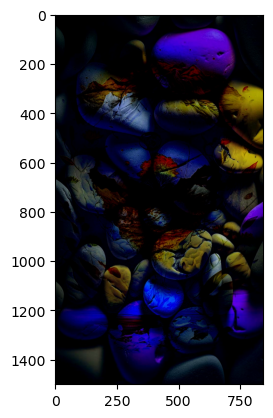

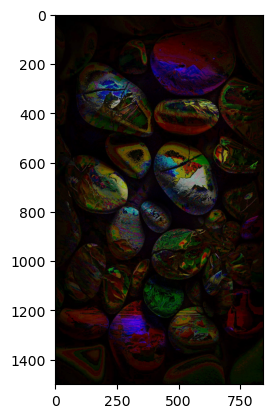

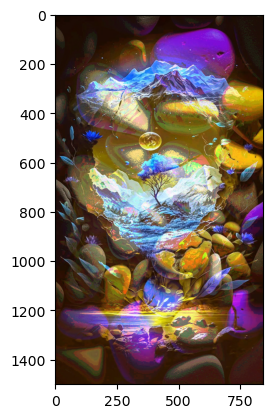

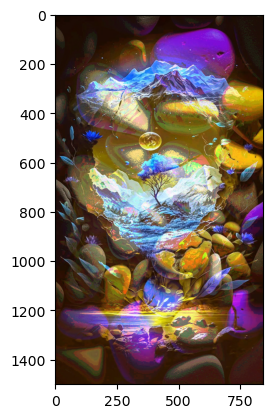

In [76]:
fondo1 = cv2.imread('fondo1.jpg') 
fondo2 = cv2.imread('fondo2.jpg')
op_aritmeticas_imagenes(fondo1, fondo2)

### Problema 4
Realice una comparacion entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaci˜An entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


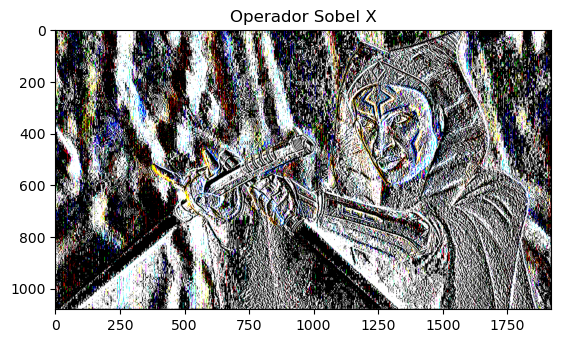

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


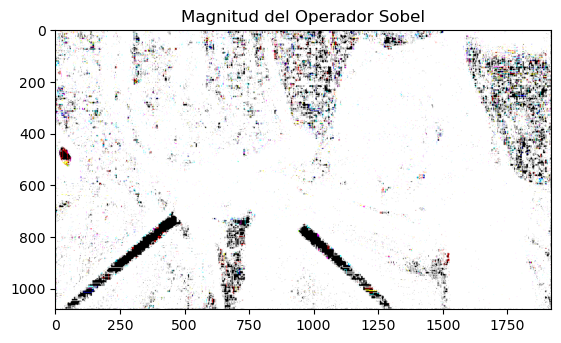

In [77]:
string4 = 'star-wars-ahsoka.jpg'
image4 = cv2.imread(string4)
image4 = cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB)
 

# Operador de Sobel
sobel_x = cv2.Sobel(image4, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image4, cv2.CV_64F, 0, 1, ksize=3)
magnitud_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

plt.imshow(sobel_x, cmap='gray')
plt.title('Operador Sobel X')
plt.show()

plt.imshow(magnitud_sobel, cmap='gray')
plt.title('Magnitud del Operador Sobel')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


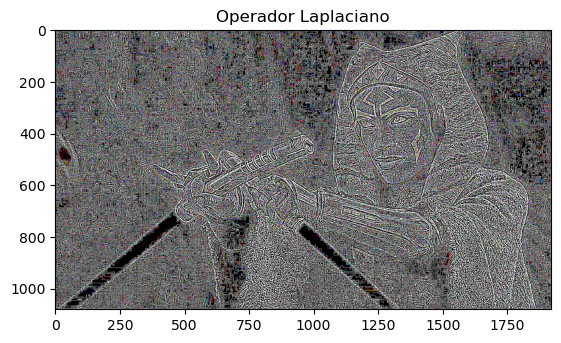

In [78]:
# Operador Laplaciano
laplaciano = cv2.Laplacian(image4, cv2.CV_64F)

plt.imshow(laplaciano, cmap='gray')
plt.title('Operador Laplaciano')
plt.show()

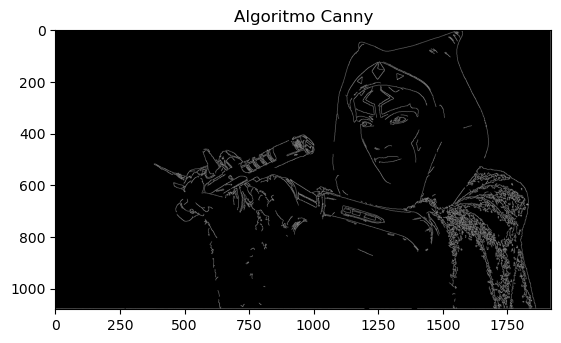

In [79]:
# Algoritmo Canny
canny = cv2.Canny(image4, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title('Algoritmo Canny')
plt.show()

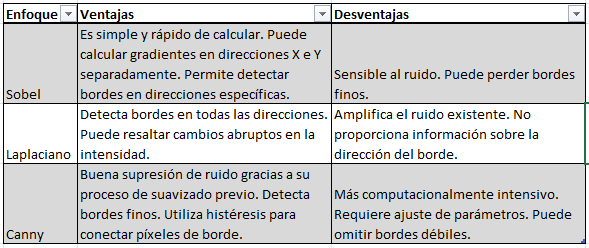

### Problema 5
Utilizando funciones de OpenCV debera aplicar los filtros de convolucion de tamano de kernel (3x3, 5x5 y 7x7) las operaciones que debera realizar son las siguientes: <br>
Kernel Gaussiano de ruido. <br>
Kernel Box de ruido.<br>
Kernel de mediana para ruido. <br>
Kernel Sobel para deteccion de bornes (en X e Y). <br>
Kernel Lapaciano para deteccion de bordes. <br>
Kernel de realce (Sharpening). <br>
Kernel de relieve (Embossing) <br>


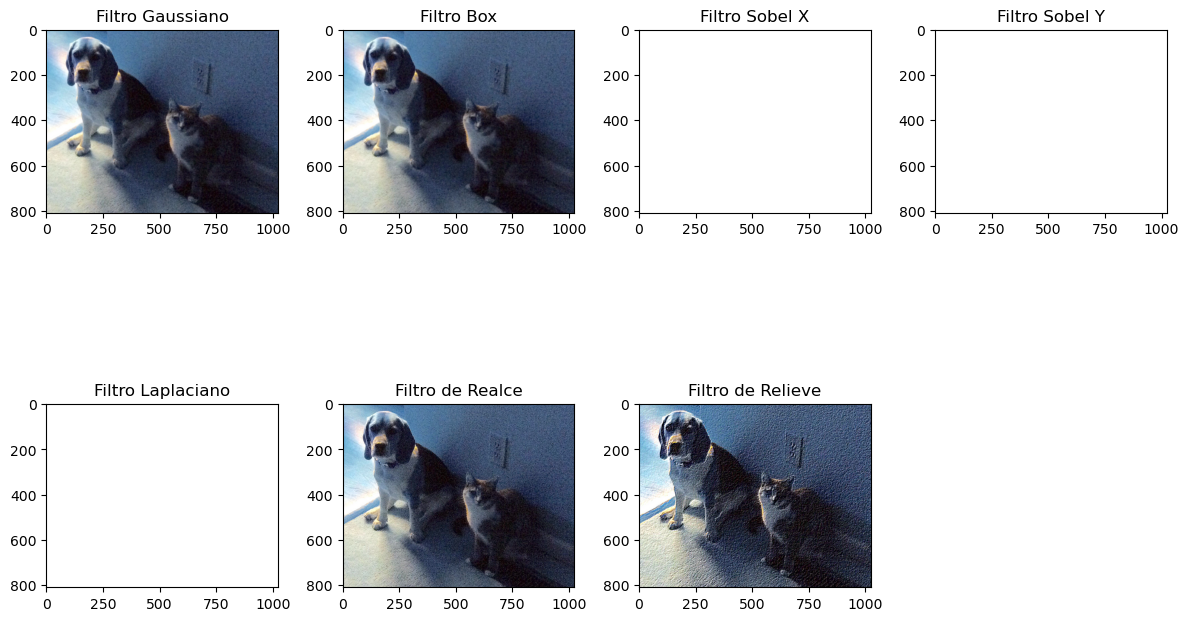

In [100]:
string5 = 'cat_dog.jpg'
img5 = cv2.imread(string5)
img5 = cv2.cvtColor(img5, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3),np.float32)/25

# kernels
kernel_gaussiano = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
kernel_box = np.ones((3, 3), dtype=np.float32) / 9.0
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_realce = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_relieve = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

# filtros
imagen_gaussiana = cv2.filter2D(img5, -1, kernel_gaussiano)
imagen_box = cv2.filter2D(img5, -1, kernel_box)
imagen_sobel_x = cv2.filter2D(img5, -1, kernel_sobel_x)
imagen_sobel_y = cv2.filter2D(img5, -1, kernel_sobel_y)
imagen_laplaciano = cv2.filter2D(img5, -1, kernel_laplaciano)
imagen_realce = cv2.filter2D(img5, -1, kernel_realce)
imagen_relieve = cv2.filter2D(img5, -1, kernel_relieve)

#resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(imagen_gaussiana, cmap='gray')
plt.title('Filtro Gaussiano')

plt.subplot(2, 4, 2)
plt.imshow(imagen_box, cmap='gray')
plt.title('Filtro Box')

plt.subplot(2, 4, 3)
plt.imshow(imagen_sobel_x, cmap='gray')
plt.title('Filtro Sobel X')

plt.subplot(2, 4, 4)
plt.imshow(imagen_sobel_y, cmap='gray')
plt.title('Filtro Sobel Y')

plt.subplot(2, 4, 5)
plt.imshow(imagen_laplaciano, cmap='gray')
plt.title('Filtro Laplaciano')

plt.subplot(2, 4, 6)
plt.imshow(imagen_realce, cmap='gray')
plt.title('Filtro de Realce')

plt.subplot(2, 4, 7)
plt.imshow(imagen_relieve, cmap='gray')
plt.title('Filtro de Relieve')

plt.tight_layout()
plt.show()
